In [10]:
import pandas as pd
import numpy as np
import networkx as nx
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [14]:
fit_list = pd.read_csv('vill_fits.csv')

In [15]:
vill_list_old = chain(range(12),range(13, 21),range(22, 77))

vill_list = [x+1 for x in vill_list_old]

vill_tri = []
vill_assort = []
size = []

for vill_no in vill_list:
    stata_household = pd.read_stata('../banerjee_data/datav4.0/Data/2. Demographics and Outcomes/household_characteristics.dta')
    file = '../banerjee_data/datav4.0/Data/1. Network Data/Adjacency Matrices/adj_' + 'allVillageRelationships' +'_HH_vilno_' + str(vill_no) + '.csv'
    vill_mat = (pd.read_csv(file, header=None)).to_numpy()
    stata_vill = stata_household.where(stata_household['village'] == vill_no).dropna(how = 'all')
    room_type = np.array(stata_vill['room_no']/np.sqrt((stata_vill['bed_no']+1))<=2)
    room_type_dict = {k: v for k, v in enumerate(room_type)}
    G = nx.from_numpy_array(vill_mat)
    n = G.number_of_nodes()
    nx.set_node_attributes(G, room_type_dict, "type")
    
    tri = np.sum(list(nx.triangles(G).values()))/3
    norm_tri = tri/(n*(n-1)/2)
    vill_tri.append(norm_tri)
    assort = nx.attribute_assortativity_coefficient(G, 'type')
    vill_assort.append(assort)
    size.append(n)
    
fit_list['true_tri'] = vill_tri
fit_list['true_assort'] = vill_assort
fit_list['size'] = size

In [16]:
fit_list

,vill_no,emd,sc,ho,true_tri,true_assort,size
0,1,0.256092,0.6250,0.6875,0.048570,0.076316,182
1,2,0.162381,0.3750,0.5625,0.023209,0.047759,195
2,3,0.180359,0.5000,0.3750,0.018265,0.001817,292
3,4,0.151081,0.5625,0.7500,0.016139,-0.007941,239
4,5,0.221382,0.5000,0.7500,0.037258,0.064246,135
...,...,...,...,...,...,...,...
70,73,0.376387,0.6875,0.8125,0.086307,0.032205,174
71,74,0.278981,0.6875,0.6875,0.029655,0.029662,170
72,75,0.375244,0.6875,0.7500,0.093635,0.083114,172
73,76,0.273448,0.7500,0.6250,0.018135,0.003902,251


In [17]:
sc = np.array(fit_list['sc'])
tri = np.array(fit_list['true_tri'])
ho = np.array(fit_list['ho'])
assort = np.array(fit_list['true_assort'])
fit = np.array(fit_list['emd'])

0.09781241860377468


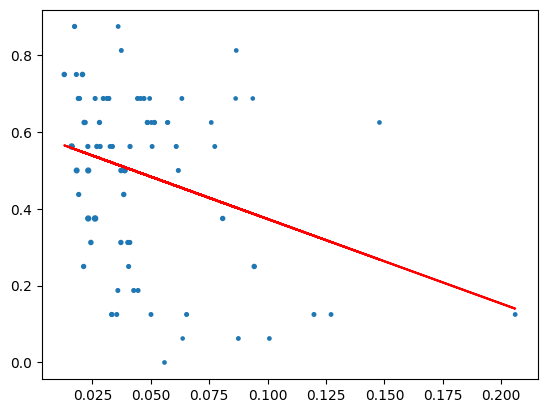

In [18]:
plt.scatter(tri, sc, s=2/fit)
m, b, r_value, p_value, std_err = scipy.stats.linregress(tri, sc)
plt.plot(tri, m*tri+b, color='red')
print(r_value**2)

0.20862553874116255


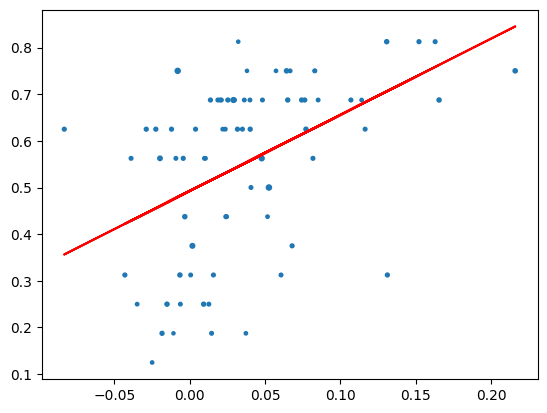

In [19]:
plt.scatter(assort, ho, s=2/fit)
m, b, r_value, p_value, std_err = scipy.stats.linregress(assort, ho)
plt.plot(assort, m*assort+b, color='red')
print(r_value**2)

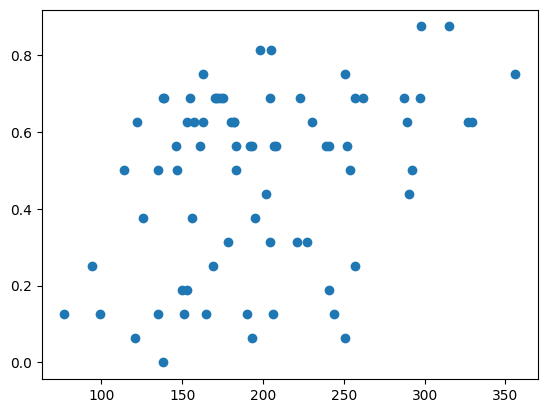

In [20]:
plt.scatter(size, sc)